In [34]:
import gymnasium as gym
import numpy
import random
import matplotlib.pyplot as plt

# Agent

In [30]:
class TaxiAgent:
    def __init__(self,
                 env,
                 learning_rate,
                 discount_factor,
                 start_exploration_prob,
                 min_exploration_prob,
                 exploration_prob_decay):
        
        self.env = env

        # Create 500x6 Q-Table filled with zeros
        self.q_table = numpy.zeros((env.observation_space.n, env.action_space.n))

        # Hyperparameters
        self.learning_rate = learning_rate                  # Alpha
        self.discount_factor = discount_factor              # Gamma
        self.exploration_prob = start_exploration_prob      # Epsilon
        self.min_exploration_prob = min_exploration_prob
        self.exploration_prob_decay = exploration_prob_decay

    # Policy
    def get_action(self, state):
        if random.uniform(0, 1) < self.exploration_prob:
            return self.env.action_space.sample() # Explore action space
        else:
            return numpy.argmax(self.q_table[state]) # Exploit learned values

    def update_q_table(self, state, action, new_state, reward):
        alpha = self.learning_rate
        gamma = self.discount_factor

        # Bellman Equation
        value = self.q_table[state, action]
        new_state_max = numpy.max(self.q_table[new_state])
        new_value = (1 - alpha) * value + alpha * (reward + gamma * new_state_max)

        # Write to Q-Table
        self.q_table[state, action] = new_value

    def decay_exploration_prob(self):
        self.exploration_prob = max(self.min_exploration_prob, self.exploration_prob - self.exploration_prob_decay)

# Training

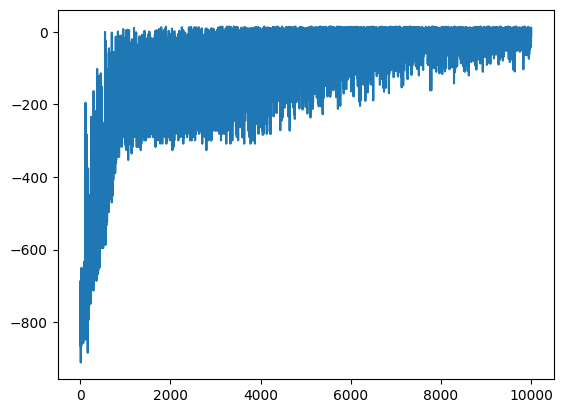

In [31]:
# ----- Parameters -----
total_episodes = 10_000
max_episode_steps = 200

learning_rate = 0.05
discount_factor = 0.95
start_exploration_prob = 1.0
min_exploration_prob = 0.1
exploration_prob_decay = start_exploration_prob / (total_episodes / 2)



env = gym.make("Taxi-v3")
taxiAgent = TaxiAgent(
    env = env,
    learning_rate = learning_rate,
    discount_factor = discount_factor,
    start_exploration_prob = start_exploration_prob,
    min_exploration_prob = min_exploration_prob,
    exploration_prob_decay = exploration_prob_decay
)

reward_sum_per_episode = []
steps_per_episode = []

# Episode
for episode in range(total_episodes):
    state, _ = env.reset()
    terminated = False
    truncated = False
    reward_sum = 0
    step = 0

    # Steps in an Episode
    while (not terminated and not truncated and step < max_episode_steps):
        action = taxiAgent.get_action(state)
        new_state, reward, terminated, truncated, _ = env.step(action)

        taxiAgent.update_q_table(state, action, new_state, reward)
        state = new_state

        reward_sum += reward
        step += 1
    
    taxiAgent.decay_exploration_prob()
    reward_sum_per_episode.append(reward_sum)
    steps_per_episode.append(step)

# Plot
plt.plot(reward_sum_per_episode)